In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import our dependencies
import csv
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

## ETL Webscraping (Wikipedia - S&P 500 Companies)

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
req = requests.get(url)
print(req)
# <Response[200]>

<Response [200]>


In [4]:
soup = bs(req.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [5]:
table = soup.find("table", class_= "wikitable sortable")
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [6]:
companies = df.drop(["SEC filings"], axis=1)
companies = companies.rename(columns={"GICS Sector": "GICS_Sector", "GICS Sub-Industry": "GICS_Sub_Industry","Headquarters Location": "Headquarters", "Date first added": "Date_First_Added"})
print(companies.head())

  Symbol     Security  GICS_Sector         GICS_Sub_Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

              Headquarters Date_First_Added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [7]:
companies.to_csv("IT_companies.csv", index = False)

In [8]:
# Note: Companies file can be used to get the list of ALL tickers for automating

## ETL Stocks Data (Yahoo Finance)

In [9]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [10]:
df_SPY.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [11]:
df_Close = df_SPY["Close"]
df_Close.name = "SPY"

In [12]:
df_Close


Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2022-07-13    378.829987
2022-07-14    377.910004
2022-07-15    385.130005
2022-07-18    381.950012
2022-07-19    392.269989
Name: SPY, Length: 641, dtype: float64

#### 10 Companies in the Real Estate Sector

In [13]:
symbols = ["AVB", "SPG", "EXR", "KIM", "PSA", "CBRE", "AMT", "DRE", "ESS", "WELL"]

for symbol in symbols:
    stock = web.DataReader(symbol, 'yahoo', start='2020-01-01', end = dt.datetime.today())
    stock.to_csv(f"{symbol}.csv")
    
print("Complete")


Complete


In [14]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [15]:
df = df_SPY[["Close"]]
df = df.rename(columns = {"Close": "SPY"})
df

,SPY
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012
...,...
2022-07-13,378.829987
2022-07-14,377.910004
2022-07-15,385.130005


In [16]:
## Note: If you need another column, Change "Close" to respective column, e.g., "Volume"
## Note: SPY is a standard dataset for getting ALL traded dates correctly, and any NULL values are dropped here, and SPY column is also dropped

symbols = ["AVB", "SPG", "EXR", "KIM", "PSA", "CBRE", "AMT", "DRE", "ESS", "WELL"]
def get_data(symbols):    
    df = df_SPY[["Close"]]
    df = df.rename(columns = {"Close": "SPY"})
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates = True, 
                         usecols = ["Date", "Close"], na_values = "nan")
        df_temp = df_temp.rename(columns = {"Close": symbol})
        df = df.join(df_temp)
    return df
df_RE = get_data(symbols)
df_RE = df_RE.drop(columns="SPY")

In [17]:
df_RE

,AVB,SPG,EXR,KIM,PSA,CBRE,AMT,DRE,ESS,WELL
Date,,,,,,,,,,
2020-01-02,207.240005,145.089996,104.730003,19.600000,211.419998,61.480000,228.500000,34.369999,298.279999,80.139999
2020-01-03,209.229996,145.350006,106.519997,19.809999,213.699997,60.970001,228.610001,35.000000,301.200012,81.550003
2020-01-06,209.580002,146.110001,106.449997,20.070000,214.460007,60.689999,228.550003,34.619999,300.000000,82.790001
2020-01-07,205.020004,144.449997,105.970001,19.830000,213.610001,60.619999,223.679993,34.400002,296.329987,82.250000
2020-01-08,205.869995,145.399994,106.180000,19.750000,214.000000,60.200001,225.619995,34.599998,298.040009,82.269997
...,...,...,...,...,...,...,...,...,...,...
2022-07-13,190.550003,95.559998,167.619995,19.879999,306.079987,75.239998,255.919998,56.880001,261.660004,81.910004
2022-07-14,189.139999,94.000000,167.470001,19.480000,306.429993,74.889999,256.510010,55.590000,261.279999,80.099998
2022-07-15,192.789993,96.360001,169.570007,20.120001,313.320007,77.959999,257.200012,57.029999,265.450012,81.220001


In [18]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_SPG = web.DataReader('SPG', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_SPG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,149.759995,144.850006,149.410004,145.089996,1849300.0,126.021042
2020-01-03,145.979996,144.000000,144.289993,145.350006,1308200.0,126.246880
2020-01-06,146.869995,144.490005,145.089996,146.110001,1026700.0,126.906975
2020-01-07,145.490005,143.509995,144.639999,144.449997,1621600.0,125.465164
2020-01-08,146.059998,144.029999,144.910004,145.399994,1397600.0,126.290283
...,...,...,...,...,...,...
2022-07-13,97.150002,95.040001,96.019997,95.559998,1821400.0,95.559998
2022-07-14,94.889999,93.059998,94.010002,94.000000,1692000.0,94.000000
2022-07-15,96.750000,94.750000,95.919998,96.360001,2034100.0,96.360001


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

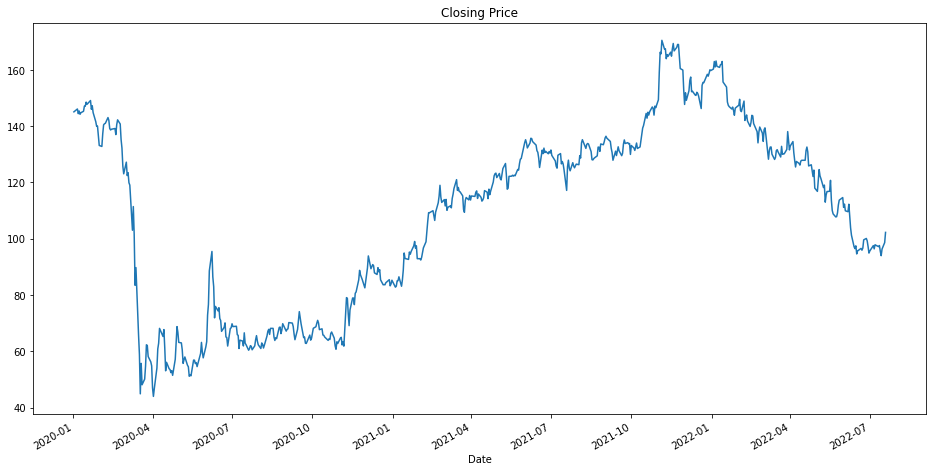

In [19]:
df_RE["SPG"].plot(figsize = (16, 8), title = "Closing Price")

In [20]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_AVB = web.DataReader('AVB', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_AVB

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,210.910004,206.070007,210.460007,207.240005,817400.0,190.337509
2020-01-03,209.570007,206.309998,206.380005,209.229996,672100.0,192.165207
2020-01-06,209.869995,208.240005,209.059998,209.580002,602000.0,192.486664
2020-01-07,208.580002,204.779999,208.190002,205.020004,850500.0,188.298584
2020-01-08,206.830002,204.559998,205.289993,205.869995,872300.0,189.079254
...,...,...,...,...,...,...
2022-07-13,191.449997,187.229996,189.759995,190.550003,484500.0,190.550003
2022-07-14,190.320007,187.110001,187.110001,189.139999,559900.0,189.139999
2022-07-15,193.649994,190.300003,192.169998,192.789993,563400.0,192.789993


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

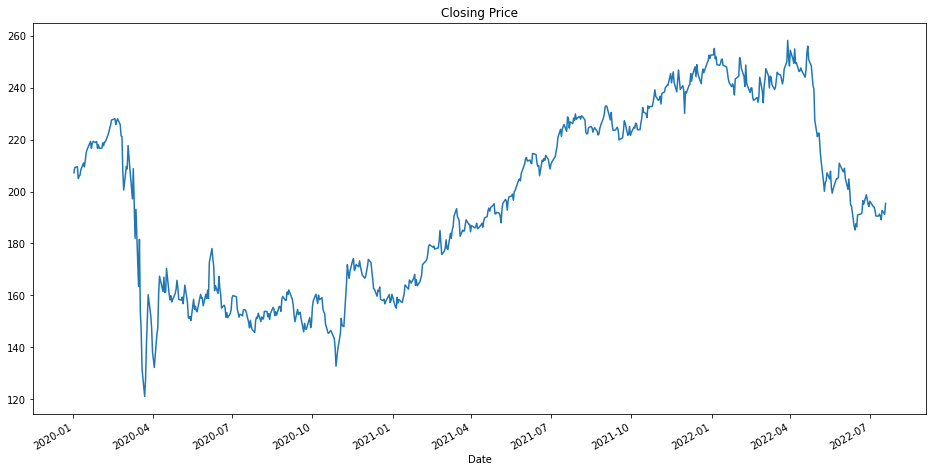

In [21]:
df_RE["AVB"].plot(figsize = (16, 8), title = "Closing Price")

In [22]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_EXR = web.DataReader('EXR', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_EXR

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,105.930000,104.230003,105.879997,104.730003,950900.0,96.765511
2020-01-03,106.589996,104.400002,104.580002,106.519997,745000.0,98.419373
2020-01-06,107.019997,105.709999,106.510002,106.449997,1207800.0,98.354706
2020-01-07,106.260002,105.260002,105.889999,105.970001,893600.0,97.911217
2020-01-08,106.410004,105.150002,105.989998,106.180000,791200.0,98.105240
...,...,...,...,...,...,...
2022-07-13,169.139999,164.699997,165.470001,167.619995,332700.0,167.619995
2022-07-14,168.729996,163.089996,164.149994,167.470001,358800.0,167.470001
2022-07-15,171.399994,167.660004,169.759995,169.570007,403600.0,169.570007


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

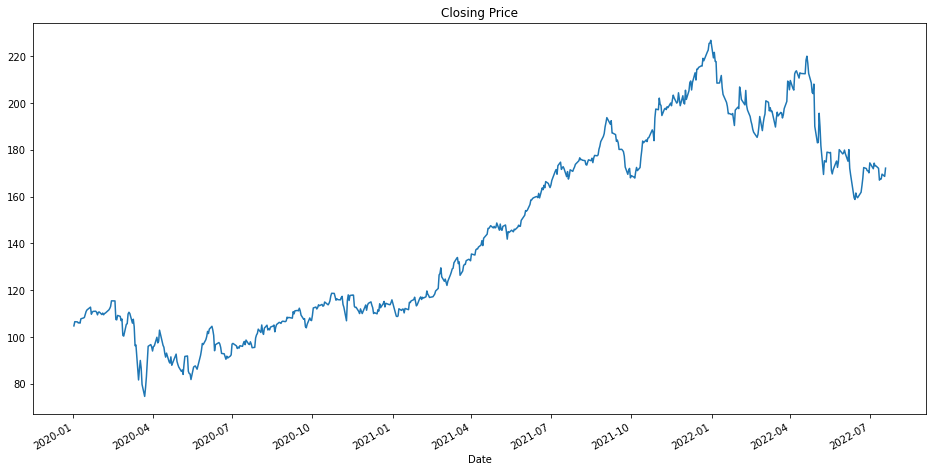

In [23]:
df_RE["EXR"].plot(figsize = (16, 8), title = "Closing Price")

In [24]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_KIM = web.DataReader('KIM', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_KIM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,20.780001,19.520000,20.780001,19.600000,7470300.0,17.797068
2020-01-03,19.910000,19.490000,19.500000,19.809999,4152400.0,17.987753
2020-01-06,20.190001,19.690001,19.790001,20.070000,3256300.0,18.223839
2020-01-07,19.969999,19.650000,19.969999,19.830000,2762700.0,18.005909
2020-01-08,19.879999,19.650000,19.820000,19.750000,3382900.0,17.933271
...,...,...,...,...,...,...
2022-07-13,20.070000,19.700001,19.930000,19.879999,3114000.0,19.879999
2022-07-14,19.629999,19.299999,19.379999,19.480000,5217800.0,19.480000
2022-07-15,20.320000,19.600000,19.889999,20.120001,3732600.0,20.120001


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

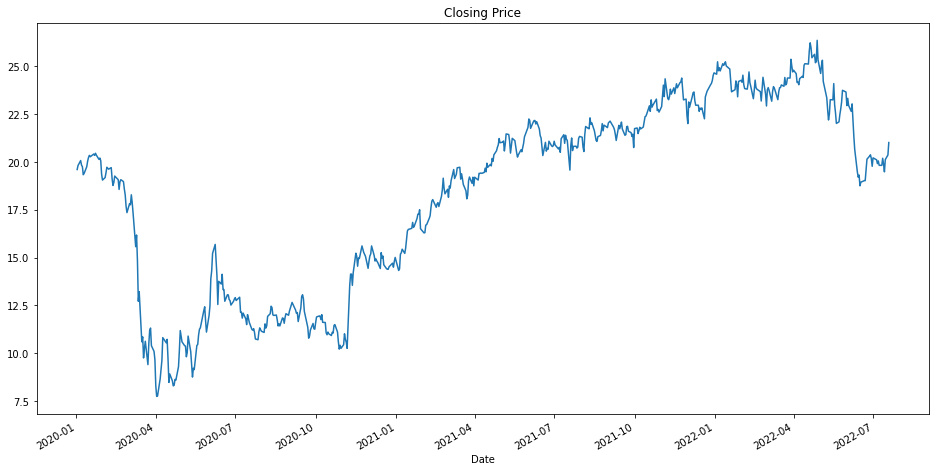

In [25]:
df_RE["KIM"].plot(figsize = (16, 8), title = "Closing Price")

In [26]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_AMT = web.DataReader('AMT', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_AMT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,231.149994,228.009995,229.679993,228.500000,1426000.0,217.444473
2020-01-03,229.830002,227.000000,227.559998,228.610001,1598900.0,217.549133
2020-01-06,230.000000,227.889999,228.479996,228.550003,1526800.0,217.492050
2020-01-07,227.570007,221.619995,227.130005,223.679993,1463800.0,212.857651
2020-01-08,226.490005,222.520004,223.479996,225.619995,1433900.0,214.703796
...,...,...,...,...,...,...
2022-07-13,258.209991,251.169998,252.410004,255.919998,1188500.0,255.919998
2022-07-14,257.850006,251.429993,251.750000,256.510010,1579200.0,256.510010
2022-07-15,260.790009,255.330002,259.880005,257.200012,1181100.0,257.200012


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

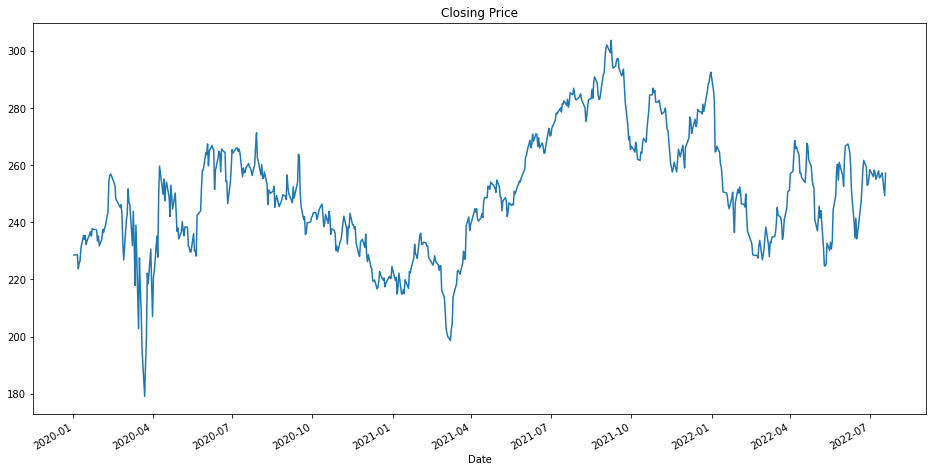

In [27]:
df_RE["AMT"].plot(figsize = (16, 8), title = "Closing Price")

In [28]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_PSA = web.DataReader('PSA', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_PSA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,214.160004,210.600006,213.820007,211.419998,862200.0,195.609161
2020-01-03,213.880005,210.759995,211.139999,213.699997,773400.0,197.718674
2020-01-06,214.929993,212.529999,212.759995,214.460007,1134300.0,198.421860
2020-01-07,214.649994,211.770004,213.220001,213.610001,1164300.0,197.635406
2020-01-08,214.179993,212.119995,213.009995,214.000000,1262100.0,197.996246
...,...,...,...,...,...,...
2022-07-13,309.320007,301.720001,304.019989,306.079987,526000.0,306.079987
2022-07-14,307.660004,299.790009,299.790009,306.429993,445900.0,306.429993
2022-07-15,313.989990,307.380005,311.160004,313.320007,734400.0,313.320007


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

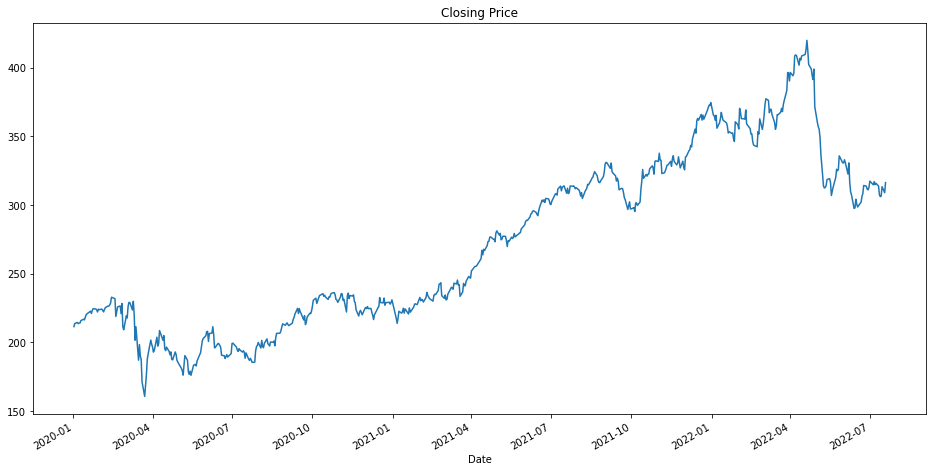

In [29]:
df_RE["PSA"].plot(figsize = (16, 8), title = "Closing Price")

In [30]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_CBRE = web.DataReader('CBRE', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_CBRE

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,61.900002,60.970001,61.900002,61.480000,1326700,61.480000
2020-01-03,61.279999,60.000000,60.439999,60.970001,1213300,60.970001
2020-01-06,60.880001,60.250000,60.560001,60.689999,1489400,60.689999
2020-01-07,60.750000,60.009998,60.669998,60.619999,1012100,60.619999
2020-01-08,61.060001,60.169998,60.810001,60.200001,1252300,60.200001
...,...,...,...,...,...,...
2022-07-13,75.870003,74.169998,75.320000,75.239998,2285100,75.239998
2022-07-14,75.040001,73.510002,73.610001,74.889999,1995200,74.889999
2022-07-15,78.080002,75.580002,75.879997,77.959999,1831500,77.959999


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

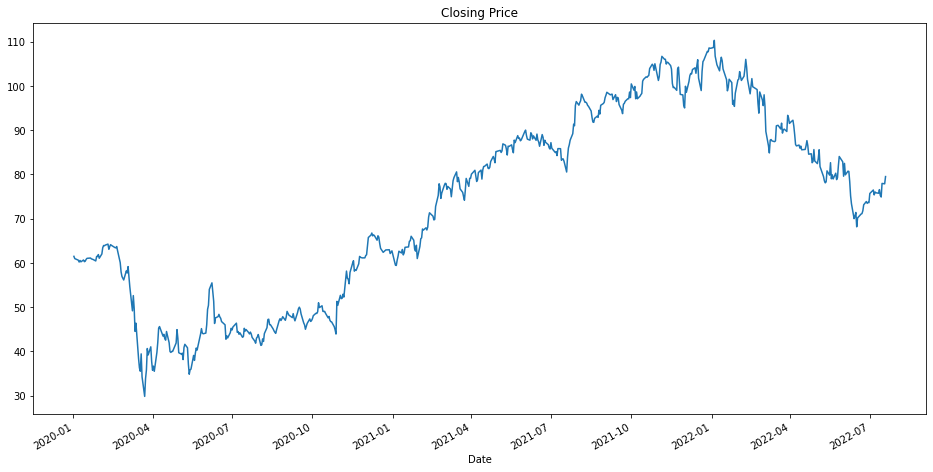

In [31]:
df_RE["CBRE"].plot(figsize = (16, 8), title = "Closing Price")

In [32]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_DRE = web.DataReader('DRE', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_DRE

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,34.889999,33.990002,34.889999,34.369999,3052400.0,32.425545
2020-01-03,35.040001,34.099998,34.119999,35.000000,3005300.0,33.019909
2020-01-06,34.900002,34.480000,34.799999,34.619999,2952300.0,32.661404
2020-01-07,34.500000,33.980000,34.320000,34.400002,1869600.0,32.453850
2020-01-08,34.669998,34.209999,34.360001,34.599998,3240700.0,32.642536
...,...,...,...,...,...,...
2022-07-13,57.369999,55.849998,56.139999,56.880001,1880500.0,56.880001
2022-07-14,56.160000,55.189999,55.740002,55.590000,2797700.0,55.590000
2022-07-15,57.200001,55.790001,56.160000,57.029999,2013500.0,57.029999


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

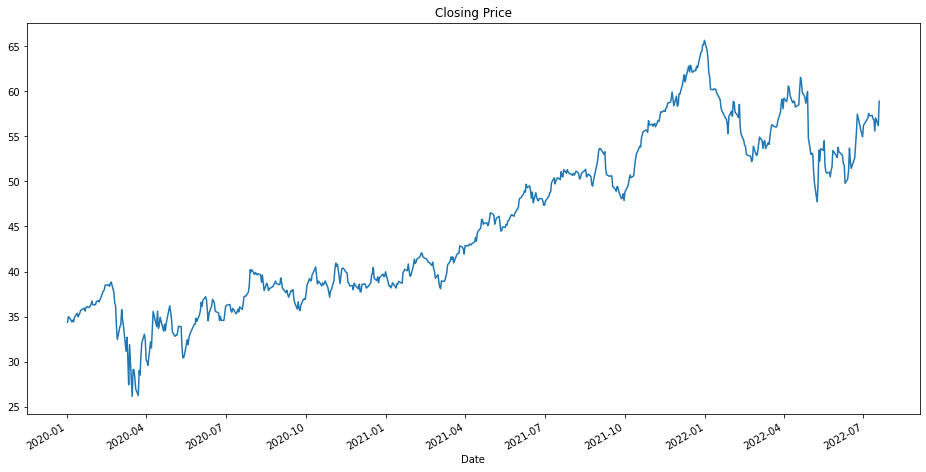

In [33]:
df_RE["DRE"].plot(figsize = (16, 8), title = "Closing Price")

In [34]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_ESS = web.DataReader('ESS', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_ESS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,303.309998,295.859985,302.230011,298.279999,412400.0,275.710419
2020-01-03,301.589996,296.500000,297.160004,301.200012,400700.0,278.409454
2020-01-06,301.940002,298.750000,300.619995,300.000000,369200.0,277.300293
2020-01-07,299.690002,294.540009,298.309998,296.329987,327200.0,273.907959
2020-01-08,299.589996,295.890015,296.829987,298.040009,450500.0,275.488586
...,...,...,...,...,...,...
2022-07-13,263.750000,257.790009,261.540009,261.660004,300500.0,261.660004
2022-07-14,261.769989,257.500000,257.500000,261.279999,450100.0,261.279999
2022-07-15,266.839996,261.779999,265.869995,265.450012,341200.0,265.450012


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

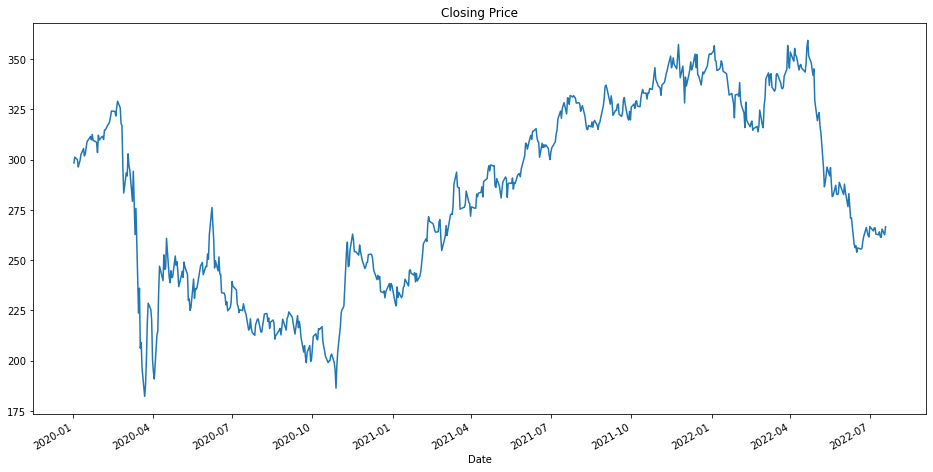

In [35]:
df_RE["ESS"].plot(figsize = (16, 8), title = "Closing Price")

In [36]:
# Get stock values for your Ticker (Symbol), Change it appropriately
df_WELL = web.DataReader('WELL', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_WELL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,82.139999,79.959999,82.089996,80.139999,2049100.0,73.047607
2020-01-03,81.660004,79.550003,79.639999,81.550003,1687000.0,74.332825
2020-01-06,83.220001,81.660004,82.089996,82.790001,2201200.0,75.463074
2020-01-07,82.540001,81.239998,82.489998,82.250000,1239500.0,74.970871
2020-01-08,82.360001,81.459999,81.919998,82.269997,2016800.0,74.989105
...,...,...,...,...,...,...
2022-07-13,82.199997,80.820000,81.540001,81.910004,2150400.0,81.910004
2022-07-14,81.660004,79.779999,80.500000,80.099998,2771100.0,80.099998
2022-07-15,81.480003,80.209999,81.190002,81.220001,2078600.0,81.220001


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

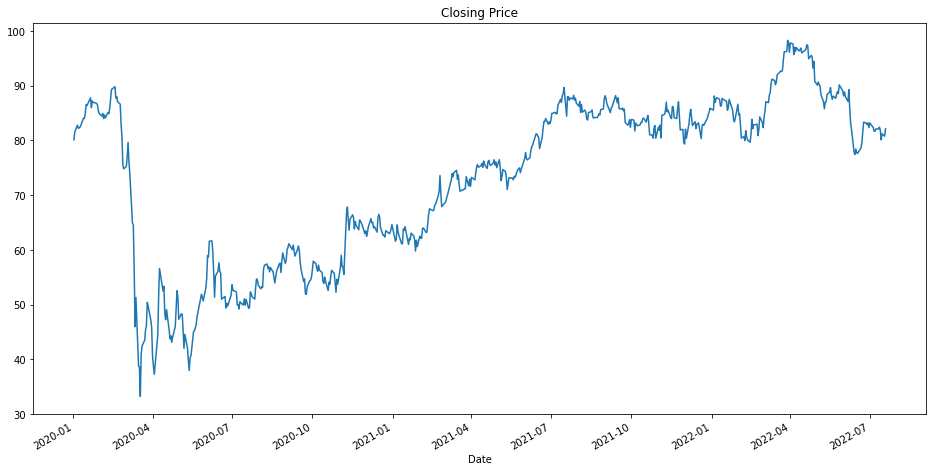

In [37]:
df_RE["WELL"].plot(figsize = (16, 8), title = "Closing Price")

<AxesSubplot:xlabel='Date'>

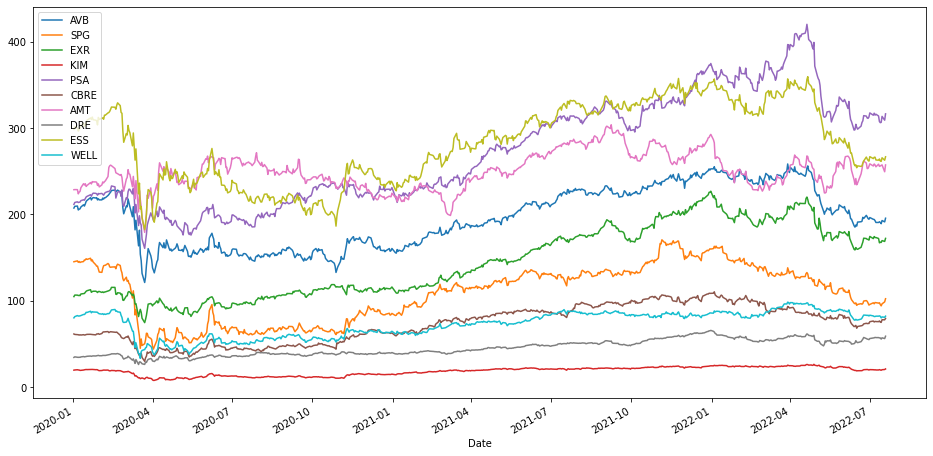

In [38]:
df_RE.plot(figsize = (16, 8))
